<a href="https://colab.research.google.com/github/yalex1402/AI_Course/blob/master/Search_Methods_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo 1: Solución de problemas mediante búsqueda**

**Integrantes:**
* Alejandro Gonzales Sanchez ***([Sanalegon](https://github.com/sanalegon))***
* Carlos Castro Godoy ***([CarlosCastroG](https://github.com/CarlosCastroG))***
* Yesid Garcia Lopez ***([Yalex1402](https://github.com/yalex1402))***






# **Especificaciones del Código:**
**1. Representación de los estados:** Los estados en este problema, se representan por las diferentes posiciones en donde se puede ubicar el enemigo.

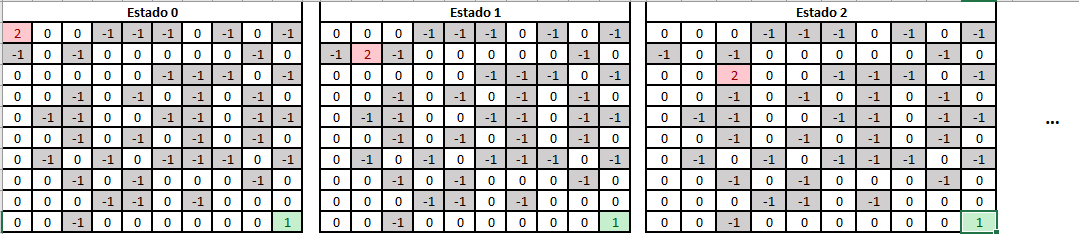


**2. Espacio del problema:** El espacio del problema se representa en los posibles movimientos que puede hacer el enemigo en la matriz.

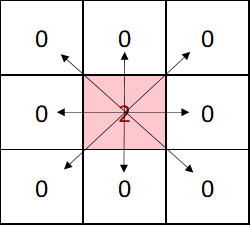

El enemigo no se moverá a espacios en donde se encuentra un "-1", ya que esto representa un múro.

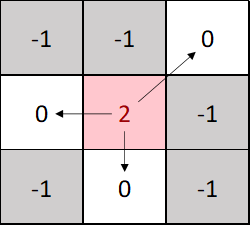

**3. Función de sucesión:** La función de sucesión está representado por el método *GeneratePossibleMatrix*, este se encarga de retornar los nodos hijos que tiene una matriz con la posición actual del enemigo.

**4. Implementación de las estrategias de búsqueda:**

**5. ¿Como se generan los obstaculos, el jugar y el enemigo?** El enemigo y el jugador se generan en la misma posición siempre, esto fue tomado como una referencia del juego Pacman donde los enemigos (fantasmas) y el personaje principal inician siempre en una misma posición. Los obstaculos se generan aleatoriamente en las filas y columnas pares del campo de juego independientemente del tamaño de este. Aquí se muestra un ejemplo en la siguiente imagen. Nota: Es importante tener en cuenta que no en todas las celdas que se tiene el valor de verdadero aparecerá un muro.

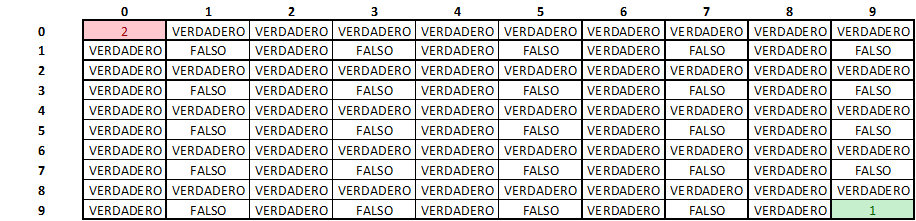

**7. ¿Como se calcula la heurística?** Esto lo hacemos con la formula para hallar la distancia de dos puntos en un plano cartesiano, en donde, evaluamos las coordenadas de dos puntos.

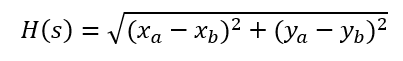




**Elementos a ubicar en la matriz:**
* **Player:** será representado por el *número 1*
* **Enemy:** será representado por el *número 2*
* **Obstacles:** será representado por el *número -1*
* **Empty Space:** será representado por el *número 0*

Un ejemplo claro se da en la siguiente imagen: 
 
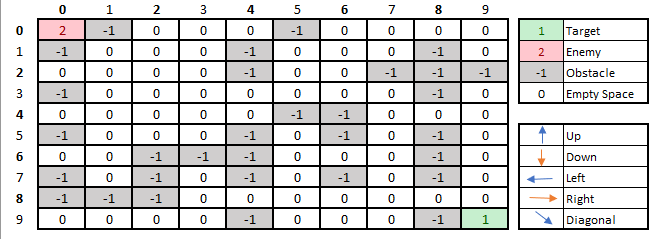

In [ ]:
import math as mt
import numpy as np
import random as rdn

'''
    This class represents a node, that means it's the simplest part in a tree
'''
class Node():
    def __init__(self,node_description,cost=0,heuristic=0):
        self.value = node_description
        self.parent = None
        self.cost = cost
        self.depth = 0
        self.heuristic = heuristic
        self.child = []

'''
    This class contains all methods to create, return and search into a tree.
    It has uninformed search methods and informed search methods.
'''
class Tree():

    def __init__(self,node_description,cost=0):
        self.Node = Node(node_description,cost,self.calculateHeuristic(node_description))
    
    def addEdge(self, node_description,cost=0):
        edge = Tree(node_description,cost)
        edge.Node.parent = self.Node
        edge.Node.cost += self.Node.cost
        edge.Node.heuristic = self.calculateHeuristic(edge.Node.value) 
        edge.Node.depth = self.Node.depth + 1
        self.Node.child.append(edge)

    def getEdge(self, child_index):
        return self.Node.child[child_index]
    
    def BFS(self):
        queueOpen=[] 
        queueClose=[]
        queueOpen.append(self)
        while len(queueOpen) > 0:
            node = queueOpen.pop(0)
            queueClose.append(node)
            enemyPosition = SearchEnemyPosition(node.Node.value)
            if (enemyPosition["i"] == NUMBER_ROWS-1 and enemyPosition["j"] == NUMBER_COLUMNS-1):
                self.get_solution(node.Node)
                break
            number_children = 0
            for child in GeneratePossibleMatrixes(node.Node.value): 
                if self.IsValidChildInClose(child, np.copy(queueClose)) and self.IsValidChildInOpen(child, np.copy(queueOpen)):
                    node.addEdge(child,1)
                    newEdge = node.getEdge(number_children)
                    queueOpen.append(newEdge)
                    number_children += 1
    
    def UCS(self):
        queueOpen=[] 
        queueClose=[]
        queueOpen.append(self)
        while (len(queueOpen) != 0):
            self.order_by_cost(queueOpen)
            node = queueOpen.pop(0)
            queueClose.append(node)
            enemyPosition = SearchEnemyPosition(node.Node.value)
            if (enemyPosition["i"] == NUMBER_ROWS-1 and enemyPosition["j"] == NUMBER_COLUMNS-1):
                self.get_solution(node.Node)
                break
            number_children = 0
            for child in GeneratePossibleMatrixes(node.Node.value): 
                if self.IsValidChildInClose(child, np.copy(queueClose)) and self.IsValidChildInOpen(child, np.copy(queueOpen)):
                    node.addEdge(child,1)
                    newEdge = node.getEdge(number_children)
                    queueOpen.append(newEdge)
                    number_children += 1

    def DFS(self):
        stackOpen=[] 
        stackClose=[]
        stackOpen.append(self)
        while (len(stackOpen) != 0):
            node = stackOpen.pop()
            stackClose.append(node)
            enemyPosition = SearchEnemyPosition(node.Node.value)
            if (enemyPosition["i"] == NUMBER_ROWS-1 and enemyPosition["j"] == NUMBER_COLUMNS-1):
                self.get_solution(node.Node)
                break
            number_children = 0
            for child in GeneratePossibleMatrixes(node.Node.value): 
                if self.IsValidChildInClose(child, np.copy(stackClose)) and self.IsValidChildInOpen(child, np.copy(stackOpen)):
                    node.addEdge(child,1)
                    newEdge = node.getEdge(number_children)
                    stackOpen.append(newEdge)
                    number_children += 1

    def BEST_FS(self):
        queueOpen=[] 
        queueClose=[]
        queueOpen.append(self)
        count = 0
        while len(queueOpen) > 0:
            node = queueOpen.pop(0)
            queueClose.append(node)
            number_children = 0
            for child in GeneratePossibleMatrixes(node.Node.value): 
                if self.IsValidChildInClose(child, np.copy(queueClose)) and self.IsValidChildInOpen(child, np.copy(queueOpen)):
                    node.addEdge(child,1)
                    newEdge = node.getEdge(number_children)
                    queueOpen.append(newEdge)
                    self.order_by_heuristic(queueOpen)
                    number_children += 1
            if node.Node.heuristic == 0:
                self.get_solution(node.Node)
                break
            count += 1
    
    def AStar_S(self):
        queueOpen=[] 
        queueClose=[]
        queueOpen.append(self)
        count = 0
        while len(queueOpen) > 0:
            node = queueOpen.pop(0)
            queueClose.append(node)
            number_children = 0
            for child in GeneratePossibleMatrixes(node.Node.value): 
                if self.IsValidChildInClose(child, np.copy(queueClose)) and self.IsValidChildInOpen(child, np.copy(queueOpen)):
                    node.addEdge(child,1)
                    newEdge = node.getEdge(number_children)
                    queueOpen.append(newEdge)
                    self.order_by_heuristic_cost(queueOpen)
                    number_children += 1
            if node.Node.heuristic == 0:
                self.get_solution(node.Node)
                break
            count += 1
    
    def IsValidChildInClose(self, childToEvaluate, queueClose):
        for element in queueClose:
            if (childToEvaluate == element.Node.value).all():
                return False
        return True    

    def IsValidChildInOpen(self, childToEvaluate, queueOpen):
        for element in queueOpen:
            if (childToEvaluate == element.Node.value).all():
                return False
        return True 

    def calculateHeuristic(self, matrix):
        enemyPosition = SearchEnemyPosition(matrix)
        return mt.sqrt(mt.pow((enemyPosition["i"])-(NUMBER_ROWS-1),2)+mt.pow((enemyPosition["j"])-(NUMBER_COLUMNS-1),2))

    def order_by_heuristic_cost(self, queue):
        i=0
        while i < len(queue) - 1:
            j= i + 1
            while j < len(queue):
                if (queue[i].Node.heuristic + queue[i].Node.cost) > (queue[j].Node.heuristic + queue[j].Node.cost) :
                    aux = queue[i]
                    queue[i] = queue[j]
                    queue[j] = aux
                j += 1
            i += 1

    def order_by_heuristic(self, queue):
        i=0
        while i < len(queue) - 1:
            j= i + 1
            while j < len(queue):
                if queue[i].Node.heuristic > queue[j].Node.heuristic :
                    aux = queue[i]
                    queue[i] = queue[j]
                    queue[j] = aux
                j += 1
            i += 1

    def order_by_cost(self, queue):
        i=0
        while i < len(queue) - 1:
            j= i + 1
            while j < len(queue):
                if queue[i].Node.cost > queue[j].Node.cost :
                    aux = queue[i]
                    queue[i] = queue[j]
                    queue[j] = aux
                j += 1
            i += 1

    def get_solution(self, node):
        if(node == None):
            return
        else:
            print(np.matrix(node.value),"\n")
            self.get_solution(node.parent)

In [ ]:
#Generate Matrix m*n
def GenerateMatrix():
    matrix = []
    row=[]
    i = 0
    while i < NUMBER_ROWS:
        j=0
        row=[]
        while j < NUMBER_COLUMNS:
            if i==0 and j ==0 :
                row.append(2)
            elif i==NUMBER_ROWS-1 and j==NUMBER_COLUMNS-1:
                row.append(1)
            elif i%2==0 or j%2==0:
                row.append(rdn.randint(-1,0))
            else:
                row.append(0)
            j+=1
        matrix.append(row)
        i+=1
    return matrix
    
#Define if any position is into the valid positions of the matrix
def IsValidPosition(position):
    if (position["i"] >= 0 and position["i"] < NUMBER_ROWS) and (position["j"] >= 0 and position["j"] < NUMBER_COLUMNS):
        return True
    return False

'''
    Each method who start with TryMoveTo is for adding or substracting into rows or columns
'''
def TryMoveToRight (column):
    column += 1
    return column

def TryMoveToLeft (column):
    column -= 1
    return column

def TryMoveToUp (row):
    row -= 1
    return row

def TryMoveToDown (row):
    row += 1
    return row

def TryMoveToDiagUpRight(row,column):
    position = {"i" : 0 , "j" : 0}
    position["i"] = TryMoveToUp(row)
    position["j"] = TryMoveToRight(column)
    return position

def TryMoveToDiagUpLeft(row,column):
    pos = {"i":0, "j": 0}
    pos["i"] = TryMoveToUp(row)
    pos["j"] = TryMoveToLeft(column)
    return pos

def TryMoveToDiagDownRight(row,column):
    pos = {"i":0, "j": 0}
    pos["i"] = TryMoveToDown(row)
    pos["j"] = TryMoveToRight(column)
    return pos

def TryMoveToDiagDownLeft(row,column):
    pos = {"i":0, "j": 0}
    pos["i"] = TryMoveToDown(row)
    pos["j"] = TryMoveToLeft(column)
    return pos
'''
    Each method start with MoveTo is for moving the enemy 
'''
def MoveToUp(matrix, enemyPosition):
    aux = matrix[enemyPosition["i"]][enemyPosition["j"]]
    matrix[enemyPosition["i"]][enemyPosition["j"]] = matrix[enemyPosition["i"]-1][enemyPosition["j"]]
    matrix[enemyPosition["i"]-1][enemyPosition["j"]] = aux
    return matrix

def MoveToDown(matrix, enemyPosition):
    aux = matrix[enemyPosition["i"]][enemyPosition["j"]]
    matrix[enemyPosition["i"]][enemyPosition["j"]] = matrix[enemyPosition["i"]+1][enemyPosition["j"]]
    matrix[enemyPosition["i"]+1][enemyPosition["j"]] = aux
    return matrix

def MoveToRight(matrix, enemyPosition):
    aux = matrix[enemyPosition["i"]][enemyPosition["j"]]
    matrix[enemyPosition["i"]][enemyPosition["j"]] = matrix[enemyPosition["i"]][enemyPosition["j"]+1]
    matrix[enemyPosition["i"]][enemyPosition["j"]+1] = aux
    return matrix

def MoveToLeft(matrix, enemyPosition):
    aux = matrix[enemyPosition["i"]][enemyPosition["j"]]
    matrix[enemyPosition["i"]][enemyPosition["j"]] = matrix[enemyPosition["i"]][enemyPosition["j"]-1]
    matrix[enemyPosition["i"]][enemyPosition["j"]-1] = aux
    return matrix

def MoveToDiagUpRight(matrix, enemyPosition):
    aux = matrix[enemyPosition["i"]][enemyPosition["j"]]
    matrix[enemyPosition["i"]][enemyPosition["j"]] = matrix[enemyPosition["i"]-1][enemyPosition["j"]+1]
    matrix[enemyPosition["i"]-1][enemyPosition["j"]+1] = aux
    return matrix

def MoveToDiagUpLeft(matrix, enemyPosition):
    aux = matrix[enemyPosition["i"]][enemyPosition["j"]]
    matrix[enemyPosition["i"]][enemyPosition["j"]] = matrix[enemyPosition["i"]-1][enemyPosition["j"]-1]
    matrix[enemyPosition["i"]-1][enemyPosition["j"]-1] = aux
    return matrix

def MoveToDiagDownRight(matrix, enemyPosition):
    aux = matrix[enemyPosition["i"]][enemyPosition["j"]]
    matrix[enemyPosition["i"]][enemyPosition["j"]] = matrix[enemyPosition["i"]+1][enemyPosition["j"]+1]
    matrix[enemyPosition["i"]+1][enemyPosition["j"]+1] = aux
    return matrix

def MoveToDiagDownLeft(matrix, enemyPosition):
    aux = matrix[enemyPosition["i"]][enemyPosition["j"]]
    matrix[enemyPosition["i"]][enemyPosition["j"]] = matrix[enemyPosition["i"]+1][enemyPosition["j"]-1]
    matrix[enemyPosition["i"]+1][enemyPosition["j"]-1] = aux
    return matrix

def SearchEnemyPosition(matrix):
    position = {"i" : 0 , "j" : 0}
    for row in matrix:
        position["j"] = 0
        for element in row:
            if element == 2:
                return position
            position["j"] += 1
        position["i"] += 1

def GeneratePossibleMatrixes(matrix):
    originalPosition = SearchEnemyPosition(matrix)
    child = []
    # Moving Up
    newPoint = { "i": TryMoveToUp(originalPosition["i"]), "j":originalPosition["j"]}
    if IsValidPosition(newPoint):
        if matrix[newPoint["i"]][newPoint["j"]] != -1:
            child.append(MoveToUp(np.copy(matrix), originalPosition))
    # Moving Down
    newPoint = { "i": TryMoveToDown(originalPosition["i"]), "j":originalPosition["j"]}
    if IsValidPosition(newPoint):
        if matrix[newPoint["i"]][newPoint["j"]] != -1:
            child.append(MoveToDown(np.copy(matrix), originalPosition))
    # Moving Right
    newPoint = { "i": originalPosition["i"] ,"j": TryMoveToRight(originalPosition["j"])}
    if IsValidPosition(newPoint):
        if matrix[newPoint["i"]][newPoint["j"]] != -1:
            child.append(MoveToRight(np.copy(matrix), originalPosition))
    # Moving Left
    newPoint = { "i": originalPosition["i"] ,"j": TryMoveToLeft(originalPosition["j"])}
    if IsValidPosition(newPoint):
        if matrix[newPoint["i"]][newPoint["j"]] != -1:
            child.append(MoveToLeft(np.copy(matrix), originalPosition))
    # Moving Down Right
    newPoint = TryMoveToDiagDownRight(originalPosition["i"],originalPosition["j"])
    if IsValidPosition(newPoint):
        if matrix[newPoint["i"]][newPoint["j"]] != -1:
            child.append(MoveToDiagDownRight(np.copy(matrix), originalPosition))
    # Moving Up Right
    newPoint = TryMoveToDiagUpRight(originalPosition["i"],originalPosition["j"])
    if IsValidPosition(newPoint):
        if matrix[newPoint["i"]][newPoint["j"]] != -1:
            child.append(MoveToDiagUpRight(np.copy(matrix), originalPosition))
    # Moving Up Left
    newPoint = TryMoveToDiagUpLeft(originalPosition["i"],originalPosition["j"])
    if IsValidPosition(newPoint):
        if matrix[newPoint["i"]][newPoint["j"]] != -1:
            child.append(MoveToDiagUpLeft(np.copy(matrix), originalPosition))
    # Moving Down Left
    newPoint = TryMoveToDiagDownLeft(originalPosition["i"],originalPosition["j"])
    if IsValidPosition(newPoint):
        if matrix[newPoint["i"]][newPoint["j"]] != -1:
            child.append(MoveToDiagDownLeft(np.copy(matrix), originalPosition))
       
    return child


In [ ]:
NUMBER_ROWS = 10
NUMBER_COLUMNS = 10
originalMatrix = GenerateMatrix()

#Estado inicial
tree = Tree(originalMatrix)
tree.BFS()
#tree.UCS()
#tree.DFS()
#tree.BEST_FS()
#tree.AStar_S()

[[ 0  0  0 -1  0 -1 -1  0  0  0]
 [-1  0  0  0  0  0  0  0 -1  0]
 [ 0 -1  0  0 -1  0 -1 -1 -1  0]
 [-1  0  0  0 -1  0  0  0  0  0]
 [-1 -1 -1 -1  0 -1  0 -1  0 -1]
 [ 0  0  0  0 -1  0 -1  0 -1  0]
 [-1  0 -1  0  0  0 -1 -1  0  0]
 [-1  0 -1  0  0  0  0  0  0  0]
 [-1 -1  0 -1  0 -1 -1 -1  1 -1]
 [ 0  0  0  0  0  0 -1  0  0  2]] 

[[ 0  0  0 -1  0 -1 -1  0  0  0]
 [-1  0  0  0  0  0  0  0 -1  0]
 [ 0 -1  0  0 -1  0 -1 -1 -1  0]
 [-1  0  0  0 -1  0  0  0  0  0]
 [-1 -1 -1 -1  0 -1  0 -1  0 -1]
 [ 0  0  0  0 -1  0 -1  0 -1  0]
 [-1  0 -1  0  0  0 -1 -1  0  0]
 [-1  0 -1  0  0  0  0  0  0  0]
 [-1 -1  0 -1  0 -1 -1 -1  2 -1]
 [ 0  0  0  0  0  0 -1  0  0  1]] 

[[ 0  0  0 -1  0 -1 -1  0  0  0]
 [-1  0  0  0  0  0  0  0 -1  0]
 [ 0 -1  0  0 -1  0 -1 -1 -1  0]
 [-1  0  0  0 -1  0  0  0  0  0]
 [-1 -1 -1 -1  0 -1  0 -1  0 -1]
 [ 0  0  0  0 -1  0 -1  0 -1  0]
 [-1  0 -1  0  0  0 -1 -1  0  0]
 [-1  0 -1  0  0  0  0  2  0  0]
 [-1 -1  0 -1  0 -1 -1 -1  0 -1]
 [ 0  0  0  0  0  0 -1  0  0  1]] 

[